# [FBI Hate Crime Reports Statistics for 2013](https://github.com/emorisse/FBI-Hate-Crime-Statistics/tree/master/2013)
This data is from agencies that reported one or more hate crime incidents occurred in their respective jurisdictions during 1 or more quarters in 2013. The data are distributed by bias motivation and quarter.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

## Importing and Cleaning the Data

In [2]:
hate_crimes = pd.read_csv('https://raw.githubusercontent.com/emorisse/FBI-Hate-Crime-Statistics/master/2013/table13.csv')

In [3]:
hate_crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 15 columns):
State                 1826 non-null object
Agency type           1826 non-null object
Agency name           1826 non-null object
Race                  1826 non-null int64
Religion              1826 non-null int64
Sexual orientation    1826 non-null int64
Ethnicity             1826 non-null int64
Disability            1826 non-null int64
Gender                1824 non-null object
Gender Identity       1824 non-null float64
1st quarter           1797 non-null float64
2nd quarter           1790 non-null float64
3rd quarter           1798 non-null float64
4th quarter           1782 non-null float64
Population            1434 non-null object
dtypes: float64(5), int64(5), object(5)
memory usage: 214.1+ KB


In [4]:
hate_crimes.head()

,State,Agency type,Agency name,Race,Religion,Sexual orientation,Ethnicity,Disability,Gender,Gender Identity,1st quarter,2nd quarter,3rd quarter,4th quarter,Population
0,Alabama,Cities,Florence,2,0,0,0,0,0,0.0,0.0,1.0,0.0,1.0,"39,481"
1,Alabama,Cities,Hoover,0,0,1,0,0,0,0.0,0.0,1.0,0.0,0.0,"84,139"
2,Alabama,Cities,Prattville,2,0,0,0,0,0,0.0,1.0,0.0,1.0,0.0,"35,154"
3,Alabama,Cities,Tuscaloosa,1,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,"94,126"
4,Alaska,Cities,Anchorage,8,0,0,0,0,0,0.0,2.0,3.0,3.0,0.0,"299,455"


In [5]:
# Creating new column 'Total reported' that adds how many hate crimes were reported for all 4 quarters
hate_crimes['Total reported'] = hate_crimes['1st quarter'] + hate_crimes['2nd quarter'] + hate_crimes['3rd quarter'] + hate_crimes['4th quarter']

# Converting 'Population' and 'Gender' columns to numeric dtype
hate_crimes['Population'] = pd.to_numeric(hate_crimes['Population'].str.replace(',','')).dropna()
hate_crimes['Gender'] = pd.to_numeric(hate_crimes['Gender'].str.replace(' ','')).dropna()

In [6]:
# Data is grouped by state then aggregated by sum to foocus on hate crimes by states rather than by individual agencies
hate_crimes_by_state = hate_crimes.drop(columns=['Agency type','Agency name']).groupby('State').agg('sum')
# Creating new column 'Total per 100,000' to view total hate crimes per 100,000 people in each state state
hate_crimes_by_state['Total per 100,000'] = hate_crimes_by_state['Total reported'].div(hate_crimes_by_state['Population']).mul(100000)

In [7]:
hate_crimes_by_state.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 14 columns):
Race                  50 non-null int64
Religion              50 non-null int64
Sexual orientation    50 non-null int64
Ethnicity             50 non-null int64
Disability            50 non-null int64
Gender                50 non-null float64
Gender Identity       50 non-null float64
1st quarter           50 non-null float64
2nd quarter           50 non-null float64
3rd quarter           50 non-null float64
4th quarter           50 non-null float64
Population            50 non-null float64
Total reported        50 non-null float64
Total per 100,000     50 non-null float64
dtypes: float64(9), int64(5)
memory usage: 5.9+ KB


In [8]:
hate_crimes_by_state.head()

,Race,Religion,Sexual orientation,Ethnicity,Disability,Gender,Gender Identity,1st quarter,2nd quarter,3rd quarter,4th quarter,Population,Total reported,"Total per 100,000"
State,,,,,,,,,,,,,,
Alabama,5,0,1,0,0,0.0,0.0,1.0,2.0,2.0,1.0,252900.0,6.0,2.372479
Alaska,8,0,0,0,0,0.0,0.0,2.0,3.0,3.0,0.0,299455.0,8.0,2.671520
Arizona,73,30,27,24,1,0.0,0.0,48.0,37.0,50.0,20.0,3809343.0,69.0,1.811336
Arkansas,17,0,8,2,0,0.0,0.0,5.0,8.0,9.0,5.0,380920.0,27.0,7.088102
California,374,129,217,115,1,0.0,7.0,215.0,220.0,222.0,186.0,23717414.0,843.0,3.554350


## Exploratory Data Analysis & Visualizations

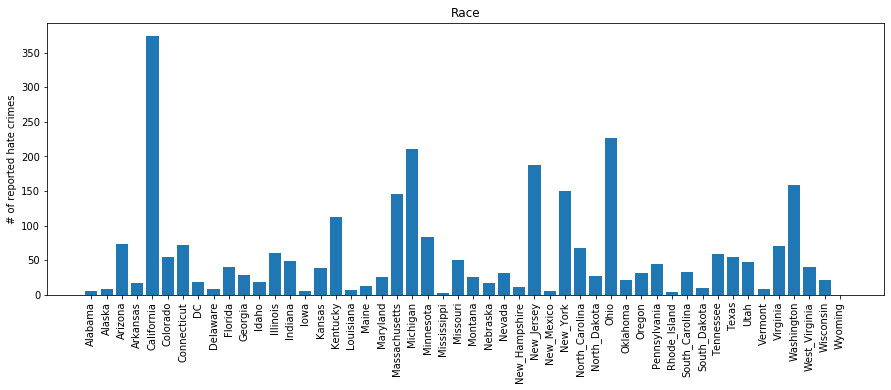

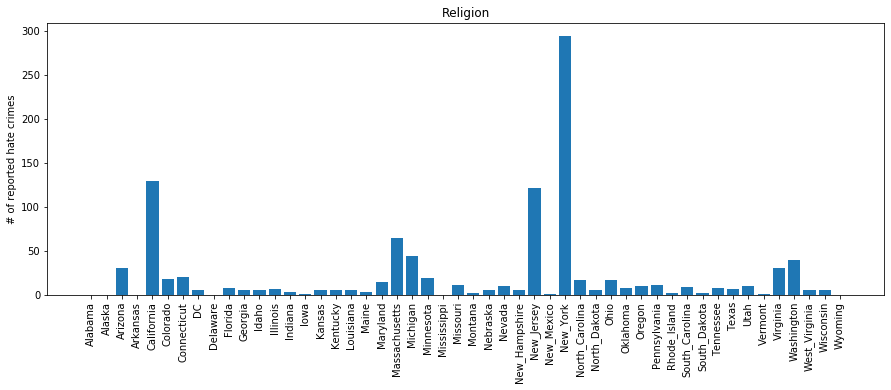

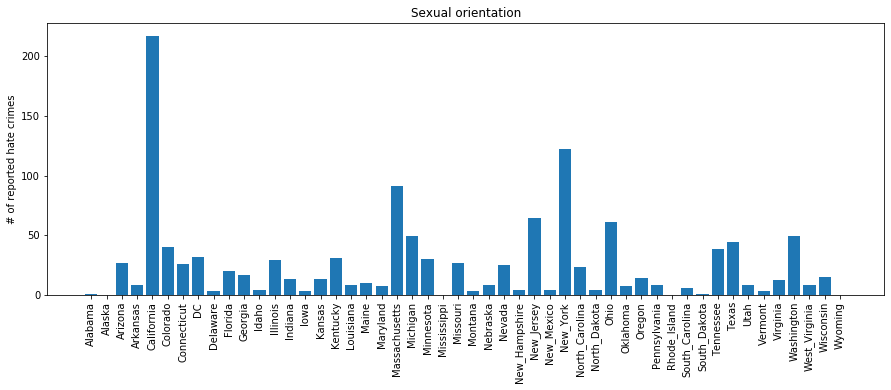

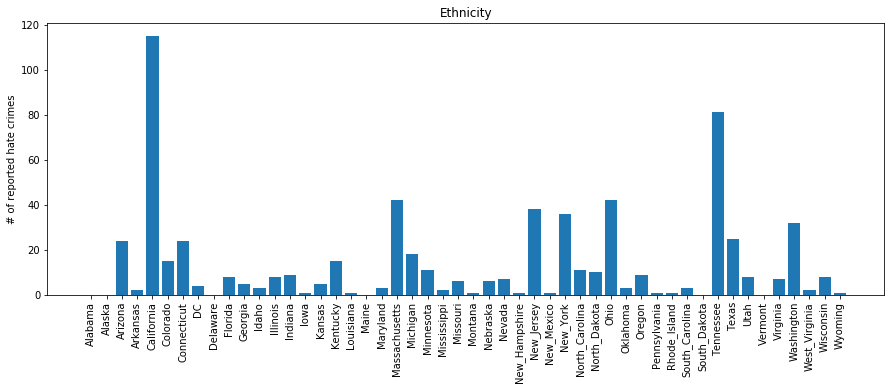

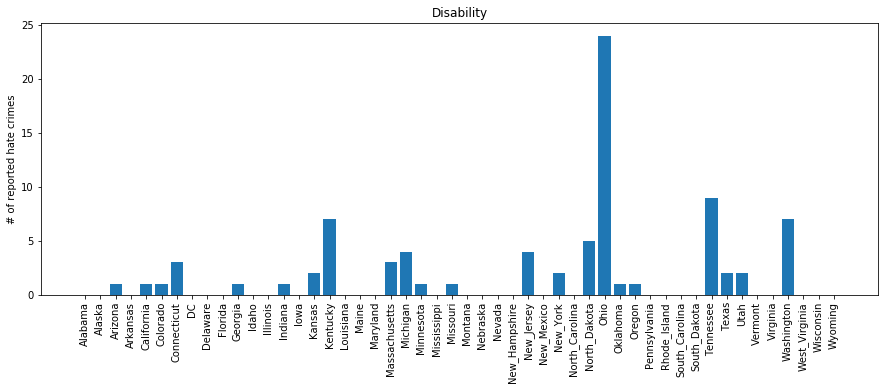

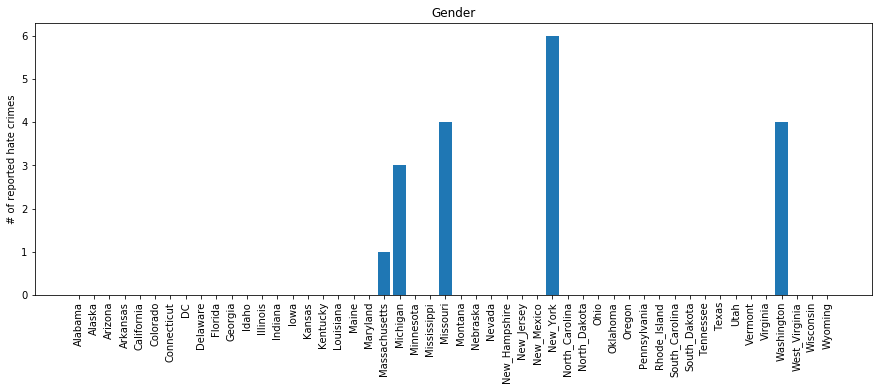

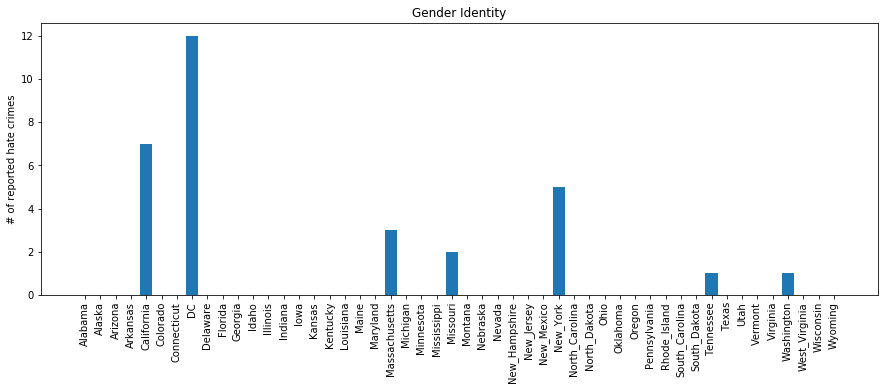

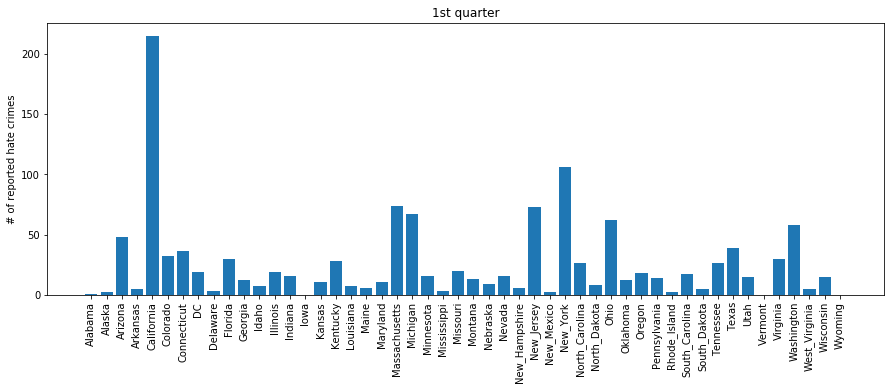

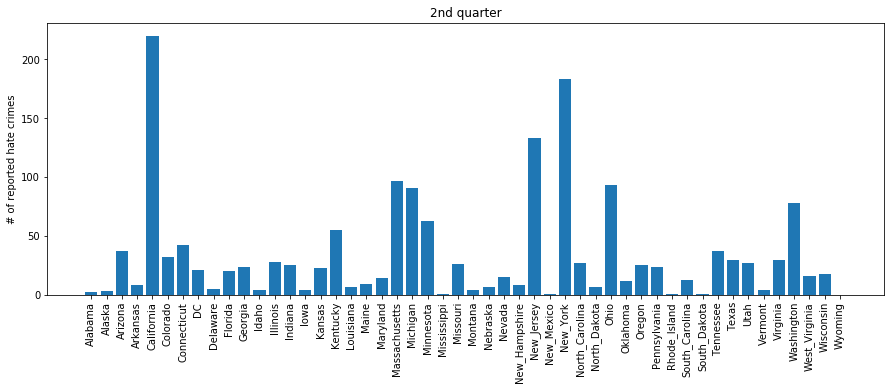

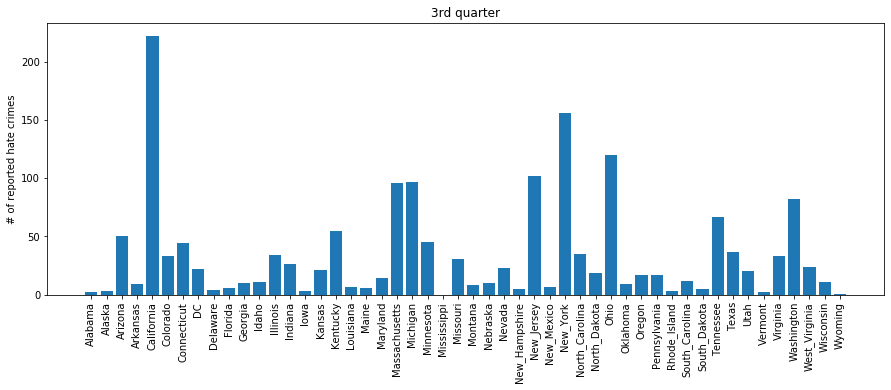

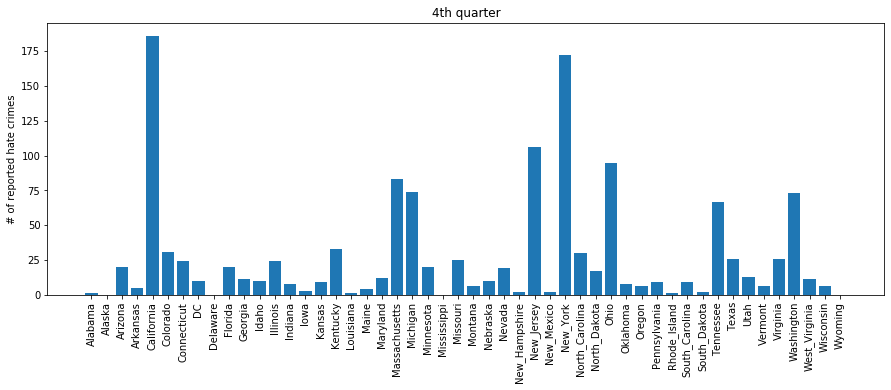

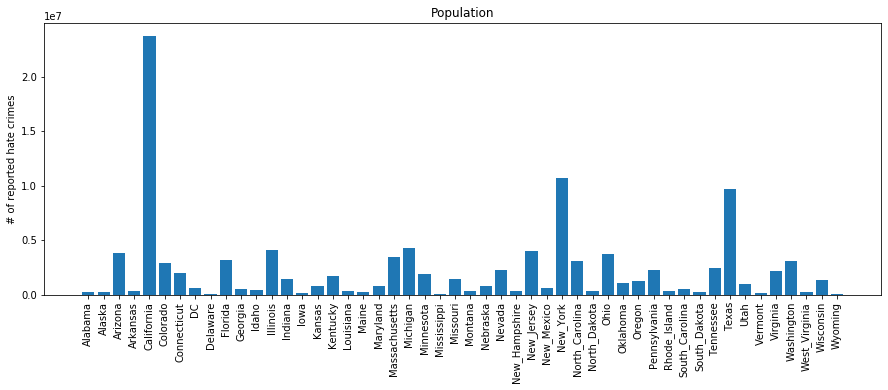

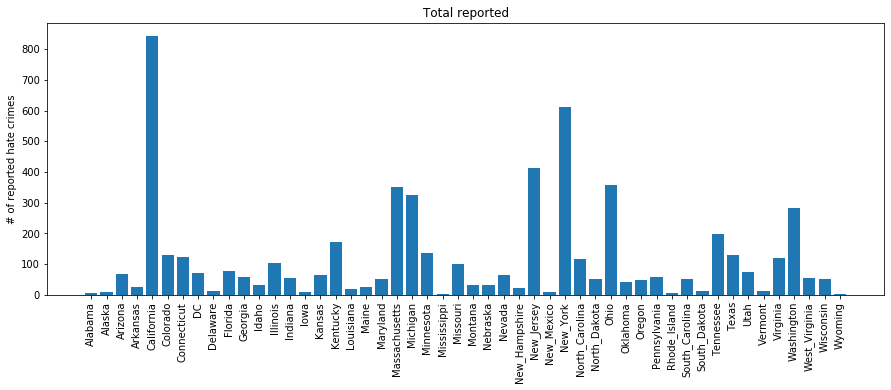

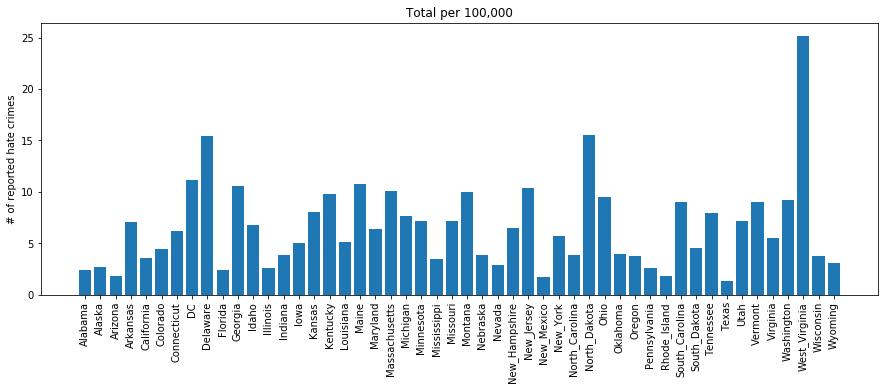

In [9]:
col_names = list(hate_crimes_by_state.columns)
for var in col_names:
    plt.figure(figsize=(15,5))
    plt.bar(hate_crimes_by_state.index, hate_crimes_by_state[var])
    plt.xticks(rotation='vertical')
    plt.ylabel('# of reported hate crimes')
    plt.title(label=var)
plt.show()

In [10]:
stats = [['Variables','Mean','Median','Min','Max']]
for var in col_names:
    info = [var, hate_crimes_by_state[var].mean(),
    hate_crimes_by_state[var].median(),
    hate_crimes_by_state[var].min(),
    hate_crimes_by_state[var].max()]
    stats.append(info)
stats = pd.DataFrame(stats,columns=stats[0]).drop(0)
stats

,Variables,Mean,Median,Min,Max
1,Race,57.44,32.5,0,374
2,Religion,20.64,6.5,0,294
3,Sexual orientation,24.74,12.5,0,217
4,Ethnicity,13.1,6,0,115
5,Disability,1.66,0,0,24
6,Gender,0.36,0,0,6
7,Gender Identity,0.62,0,0,12
8,1st quarter,25.3,15,0,215
9,2nd quarter,33.1,20.5,0,220
10,3rd quarter,33.52,18,0,222


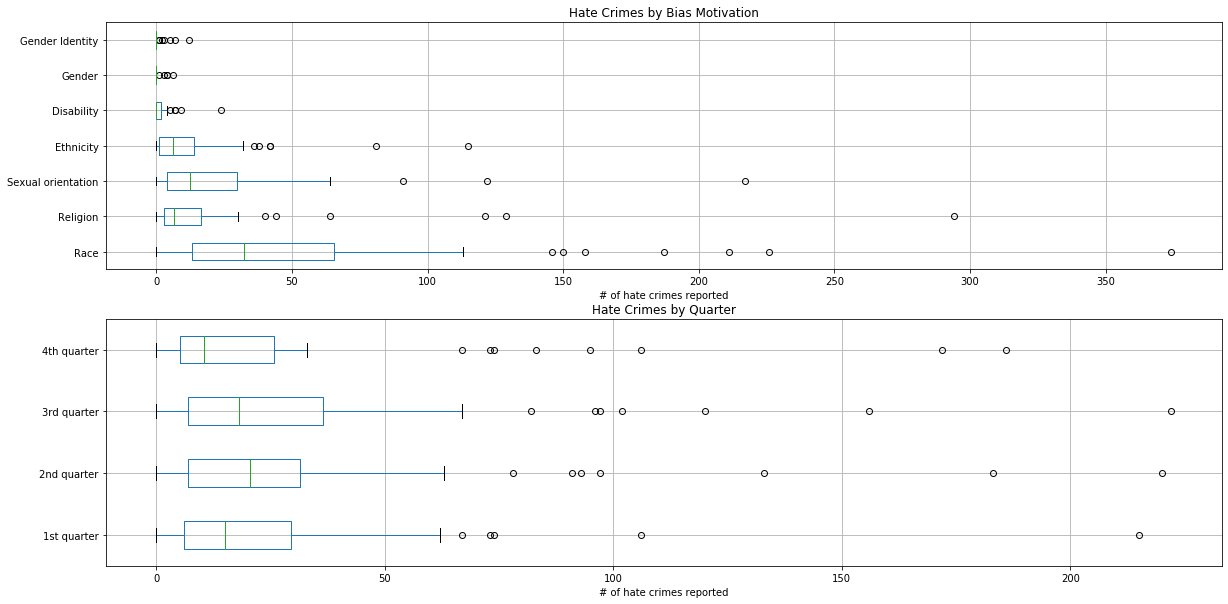

In [11]:
plt.figure(figsize=(20,10))

plt.subplot(2, 1, 1)
hate_crimes_by_state.boxplot(column=col_names[:7], vert=False)
plt.xlabel('# of hate crimes reported')
plt.title('Hate Crimes by Bias Motivation')

plt.subplot(2, 1, 2)
hate_crimes_by_state.boxplot(column=col_names[7:11], vert=False)
plt.xlabel('# of hate crimes reported')
plt.title('Hate Crimes by Quarter')

plt.show()

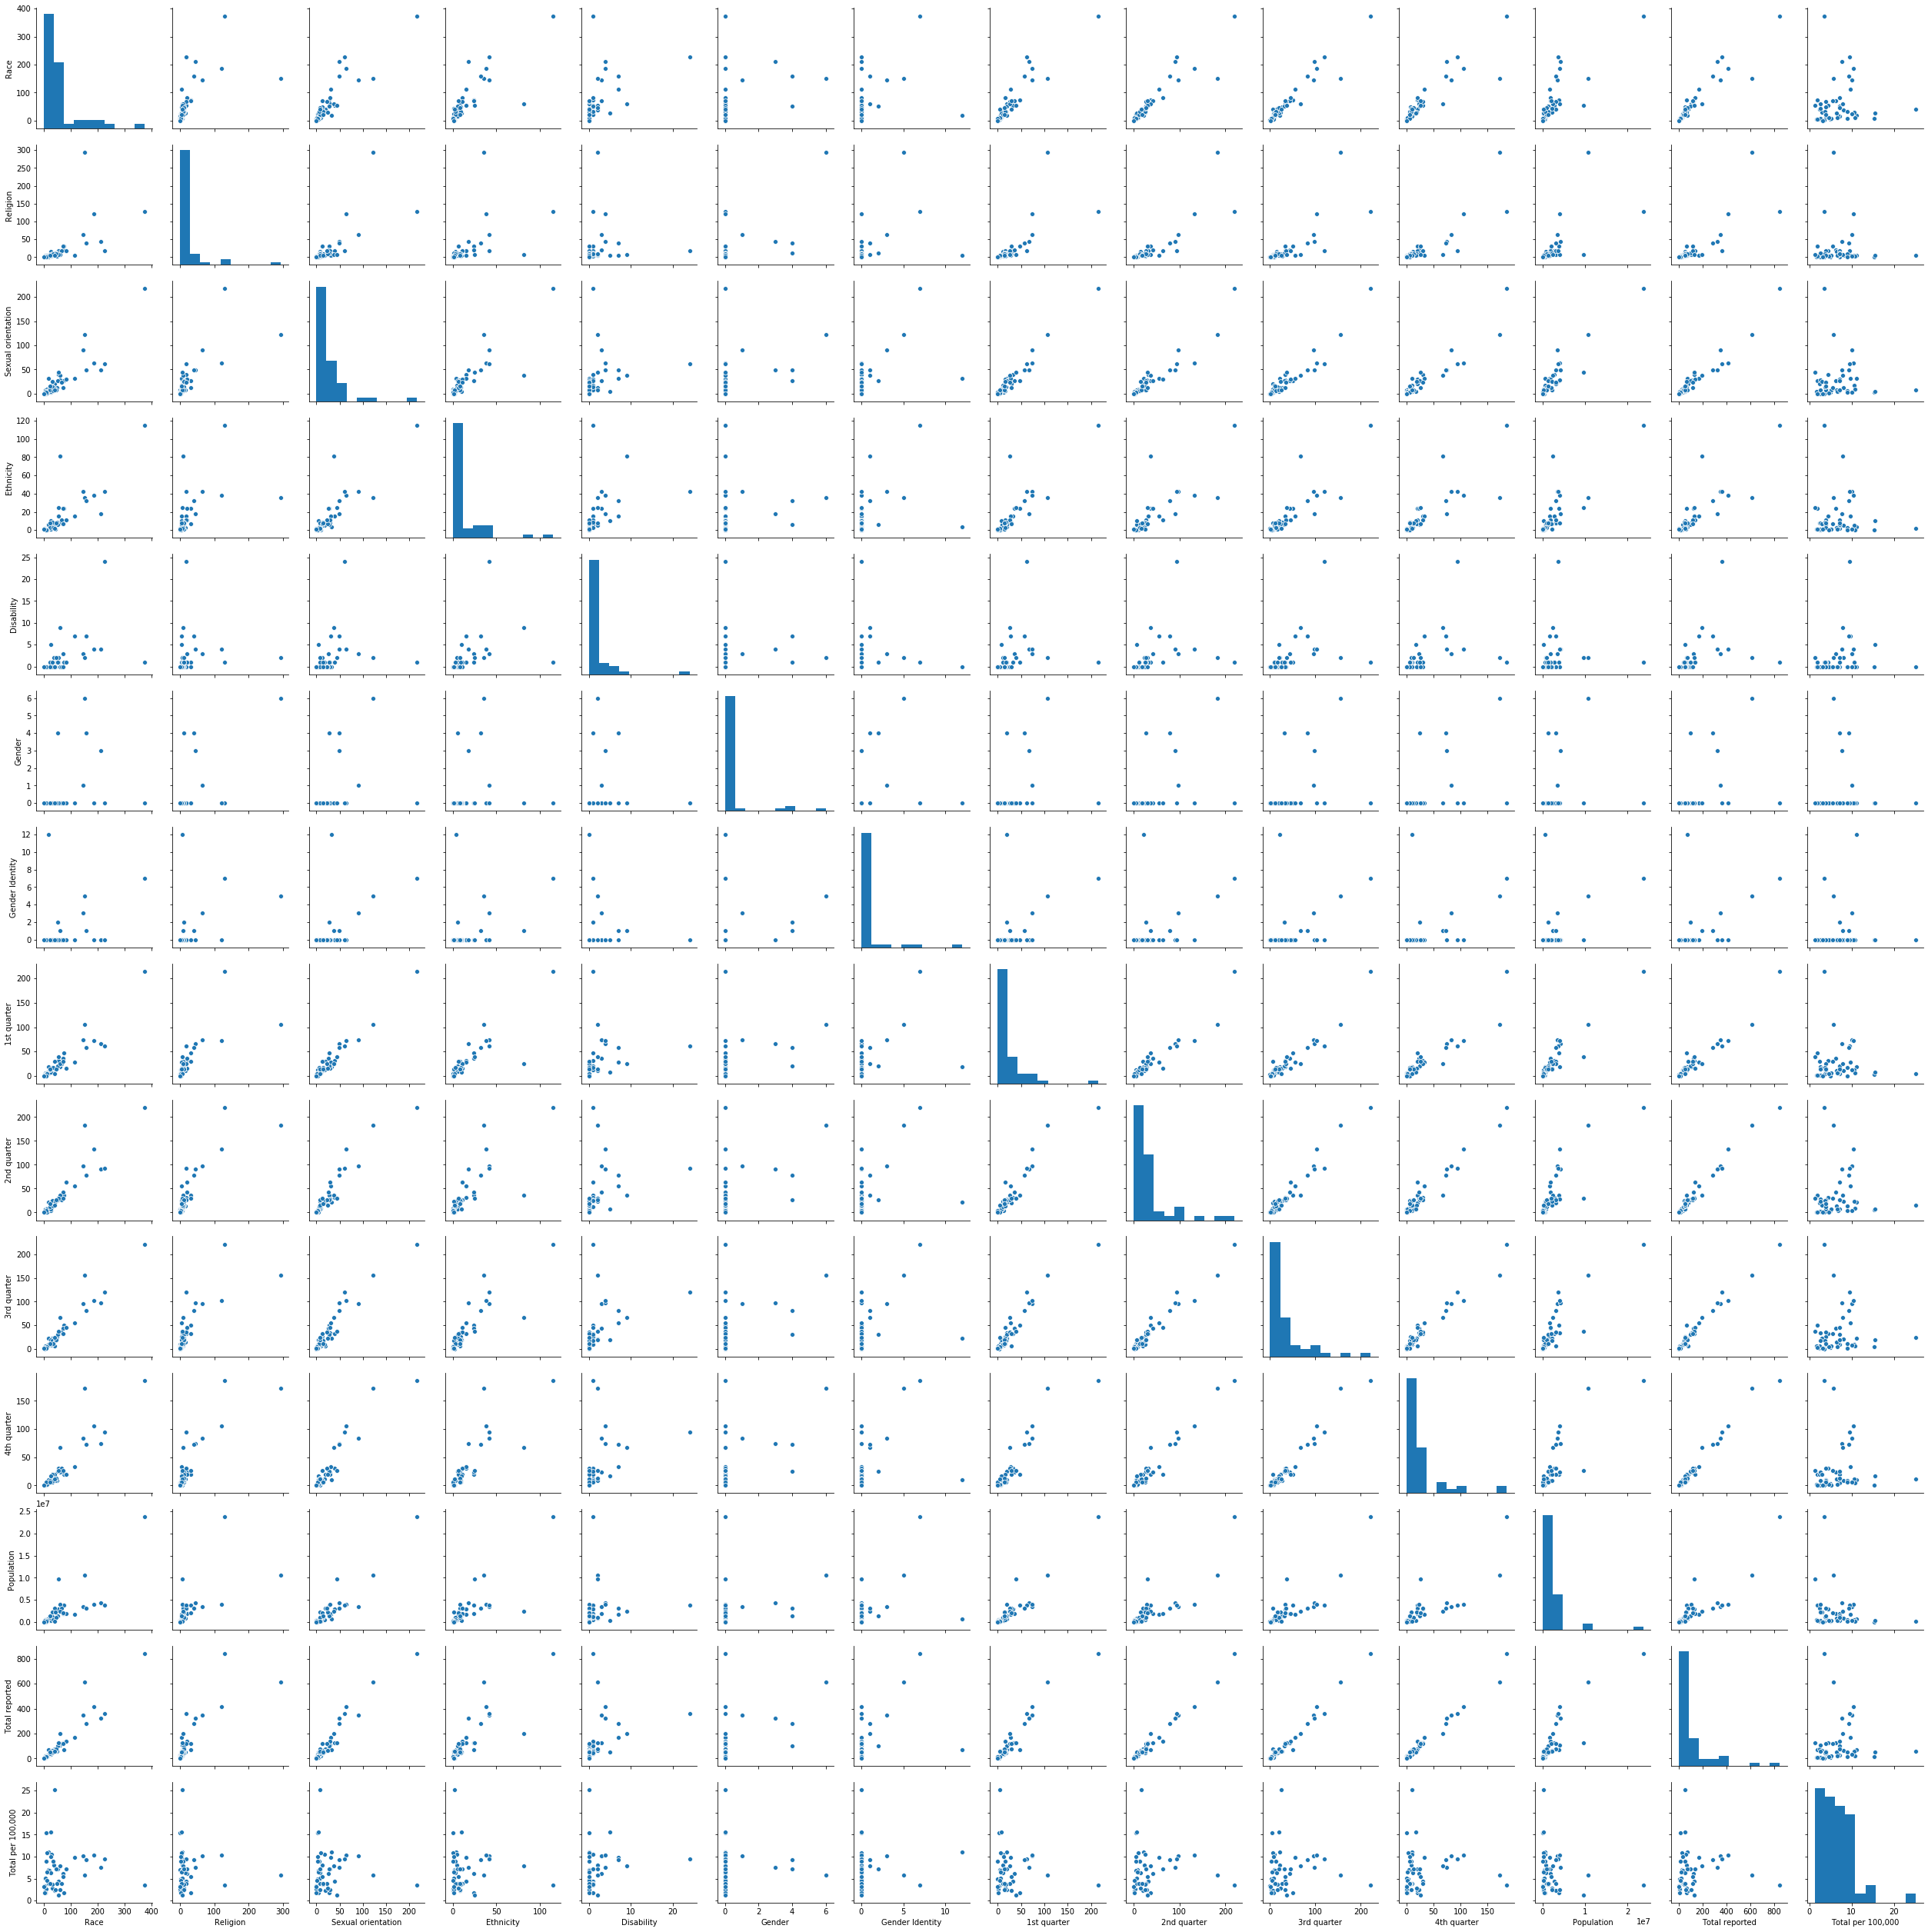

In [12]:
sns.pairplot(hate_crimes_by_state)
plt.show()

### Simple Findings and Observations
1. California has the most reported hate crimes
2. West Virginia has the most reported hate crimes per 100,000 people
3. Wyoming has the least reported hate crimes
4. Texas has the least reported hate crimes per 100,000 people

In [13]:
hate_crimes_by_state.sort_values('Total reported').head(1)

,Race,Religion,Sexual orientation,Ethnicity,Disability,Gender,Gender Identity,1st quarter,2nd quarter,3rd quarter,4th quarter,Population,Total reported,"Total per 100,000"
State,,,,,,,,,,,,,,
Wyoming,0,0,0,1,0,0.0,0.0,0.0,0.0,1.0,0.0,31884.0,1.0,3.136369


In [14]:
hate_crimes_by_state.sort_values('Total per 100,000').head(1)

,Race,Religion,Sexual orientation,Ethnicity,Disability,Gender,Gender Identity,1st quarter,2nd quarter,3rd quarter,4th quarter,Population,Total reported,"Total per 100,000"
State,,,,,,,,,,,,,,
Texas,54,7,44,25,2,0.0,0.0,39.0,30.0,37.0,26.0,9657128.0,129.0,1.335801


## Telling the Story of the Data Story

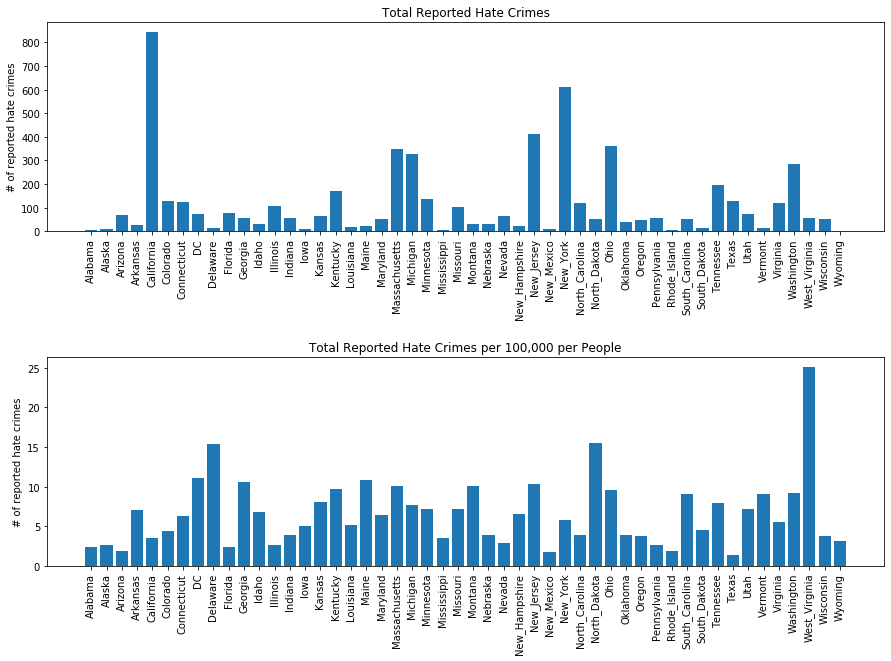

In [15]:
plt.figure(figsize=(15,10))

plt.subplot(2, 1, 1)
plt.bar(hate_crimes_by_state.index, hate_crimes_by_state['Total reported'])
plt.xticks(rotation='vertical')
plt.ylabel('# of reported hate crimes')
plt.title(label='Total Reported Hate Crimes')

plt.subplot(2, 1, 2)
plt.bar(hate_crimes_by_state.index, hate_crimes_by_state['Total per 100,000'])
plt.xticks(rotation='vertical')
plt.ylabel('# of reported hate crimes')
plt.title(label='Total Reported Hate Crimes per 100,000 per People')

plt.subplots_adjust(hspace=0.6)
plt.show()

Hate crimes happen all over the US. Now if you were to guess which state had the most hate crimes a good educational guess would be "well whichever state has the highest population." That guess would be right! California is the state with the highest population and with that they do have the highest amount of reported hate crimes in the year 2013. Now, although this is all true, the likelihood of someone experienceing a hate crime of any kind in California is relatively low. "How is this?" you must ask. Well, if you look at the amount of hate crimes reported per 100,000 people instead of the just the total amount in the entire state, West Viriginia then has the highest amount. This means you are more likely to experience a hate crime in West Virginia than in California even though California has reported the most amount of hate crimes.